In [1]:
!git clone https://github.com/hasan-sh/advanced-nlp.git

Cloning into 'advanced-nlp'...
remote: Enumerating objects: 120, done.
remote: Counting objects: 100% (120/120), done.
remote: Compressing objects: 100% (95/95), done.
remote: Total 120 (delta 51), reused 63 (delta 15), pack-reused 0
Receiving objects: 100% (120/120), 18.67 MiB | 6.68 MiB/s, done.
Resolving deltas: 100% (51/51), done.


In [2]:
!pwd

/content


In [3]:
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

from sklearn.metrics import *
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
train_file = '/content/drive/MyDrive/VU/Advanced NLP/Ass. 2/output_firstmodel_baseline.csv'
test_file = '/content/advanced-nlp/data/en_ewt-up-test.conllu'

In [ ]:
def read_data(file_path, save_to_csv=False):
    """
    This function reads a CoNLL-U format file and converts it into a pandas DataFrame.
    Each row in the DataFrame corresponds to a token in the file, and columns
    correspond to different features of the token, such as the token itself, its lemma, 
    part-of-speech tag, and syntactic dependency information.
    
    Parameters:
    file_path (str): The path to the input CoNLL-U format file.
    save_to_csv (bool): A boolean flag indicating whether to save the resulting DataFrame 
                        to a CSV file. Default is False.
                        
    Returns:
    df (pandas.DataFrame): A pandas DataFrame containing the token-level information from
                           the input file.
    """
    
    # Open and read the input file
    with open(file_path, 'r', encoding='utf-8', ) as f:
        train_data = f.read()
    
    # Split the file into individual documents, each separated by a blank line
    data = []
    for doc_i, doc in enumerate(train_data.split('\n\n')):
        doc = doc.split('\n')
        sentences = ''
        for line in doc:
            # Skip lines starting with '#' (comment lines)
            if line and line[0] != '#':
                line = line.split('\t')
                line.insert(0, str(doc_i))
                sentences += '\t'.join(line) + '\n'
        data.append(sentences)
    
    # Create a pandas DataFrame from the token-level data
    train_df = pd.DataFrame([x.split('\t') for sent in data for x in sent.split('\n') if x])
    
    # Rename the columns of the DataFrame
    train_df = train_df.rename(columns={
        0:'sent_id', 
        1:'token_id', 
        2:'token', 
        3:'lemma', 
        4:'POS', 
        5:'uni_POS',
        6:'morph_type', 
        7:'distance_head', 
        8:'dep_label', 
        9:'dep_rel', 
        10:'space', 
        11:'probbank'
    })
    
    # Convert the DataFrame from wide to long format
    df = train_df.melt(
        id_vars=[i for i in train_df.columns[:12]], 
        var_name="notneeded", 
        value_name="target"
    )
    
    # Drop the 'notneeded' column and any rows that contain missing values
    #df["sent_id"]=df['sent_id'].str.cat((df['notneeded'].astype(int)-12).astype(str) , sep="_" )
    df["repetion_id"]=df["notneeded"]-12
    df.drop(['notneeded'], axis=1, inplace=True)
    df = df[df['target'].notna()]
    
    # Optionally save the resulting DataFrame to a CSV file
    if save_to_csv:
        df.to_csv('/content/advanced-nlp/data/test.tsv', sep='\t', index=False)
    
    # Return the resulting DataFrame

    return df

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#train = read_data(train_file, save_to_csv=True)

# Open and read the output of the 1st model
train = pd.read_csv(train_file)

# remove rows with label zero
train = train[train.predictions != 0]

test = read_data(test_file, save_to_csv=True)

In [ ]:

## Ignore those functions (they are also the same at the +features)
def make_targets_categorical_label(df):

  ## Create an instance of CountVectorizer for training data tokens
  #count_vectorizer = CountVectorizer()

  # Create an instance of LabelEncoder for training data targets
  label_encoder = LabelEncoder()




  #x_train = df['token']
  y_train = df['target']

 
  # Fit the label encoder to the tokens
  label_encoder.fit(y_train)

  #y_all = np.concatenate([y_train], axis=0)

  # Fit the label encoder to the targets
  label_encoder.fit(y_train)


  # Encode training data y
  y_train = label_encoder.transform(y_train)


  #print(X_train)
  print(f'{len(set(y_train))}: Arguement categories')


  #df = df.assign(label=[0 if target=="_" or target=="V" else 1 for target in df['target']])
  #df= df.drop('target', axis=1)
  return y_train

#clean column
def columns_cleaning(df): #political choices inside
  """This function perform a preprocessing steps that consists of:
  - in removing rows with missinvg value for distance head feature
  - cast numerical features to int 
  - drop token_id (I belive is useless)
  

  """
  df=df[df["distance_head"]!="_"]#like this
  df["distance_head"]=df["distance_head"].astype(int) #WARNING IS FROM HERE
  
  df["sent_id"]=df["sent_id"].astype(int) #WARNING IS FROM HERE

  df= df.drop('token_id', axis=1) #or this
  df=df[['sent_id', 'repetion_id','token', 'lemma', 'POS', 'uni_POS', 'morph_type',
        'distance_head', 'dep_label', 'dep_rel', 'space', 'probbank' ,'label']]

  return df


def make_NER(df):
  return df


"""cols_to_encode=[ 'token', 'lemma', 'POS', 'uni_POS',
       'morph_type', 'dep_label', 'dep_rel', 'space',
       'probbank']"""

"""cols_to_encode=[ 'POS', 'uni_POS',
       'morph_type', 'dep_label', 'dep_rel', 'space',
       'probbank']"""


def create_encoding(train_df,test_df,cols_to_encode):
  """This function creates a label encoding (just assign number to every value) for all columns in the list cols_to_encode """
  # create a LabelEncoder objec
  oe = OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=-1)
  train_df=oe.fit_transform(df_train[cols_to_encode])
  test_df = oe.transform(df_test[cols_to_encode])
  #print(oe.categories_)
  # iterate over the columns to encode
  """for col in cols_to_encode:
      train_df[col] = oe.fit_transform(train_df[col])
      test_df[col] = oe.transform(test_df[col])
  """
  return train_df, test_df


##BASELINE WITH ONLY TOKEN

In [ ]:
def prepare_token_data(tokens_train, tokens_test):

  encoder = LabelEncoder()
  vectorizer = CountVectorizer()

  X_train = vectorizer.fit_transform(tokens_train['token'])
  X_test = vectorizer.transform(tokens_test['token'])
  

  y_train = tokens_train['target']
  y_test = tokens_test['target']
  y_all = np.concatenate([y_train, y_test], axis=0)


  # Fit the label encoder to the targets
  encoder.fit(y_all.astype(str))

  
  y_train = encoder.transform(y_train.astype(str))
  y_test = encoder.transform(y_test.astype(str))




  return X_train, X_test, y_train, y_test, encoder


In [ ]:
def logistic_reg(X_train, X_test, y_train, y_test):
  #instantiate the model
  log_regression = LogisticRegression(penalty='l2')

  #fit the model using the training data
  log_regression.fit(X_train, y_train)

  #use model to make predictions on test data
  y_pred = log_regression.predict(X_test)
  return y_pred

In [ ]:
def confusion_mtrx(y_test, y_pred):

  # get all categories of LabelEncoder in list
  categories = list(set(y_test))

  size = len(categories)

  cm = confusion_matrix(y_test, y_pred)
  ax= plt.subplot()

  #ax.rcParams['figure.figsize'] = [3.8,3.8]

  sns.heatmap(cm, annot=True, fmt='g', ax=ax,cmap='Blues');  #annot=True to annotate cells, ftm='g' to disable scientific notation
  sns.color_palette("tab10")  
  


  # labels, title and ticks
  ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
  ax.set_title('Confusion Matrix'); 
  ax.xaxis.set_ticklabels(categories); ax.yaxis.set_ticklabels(categories);
  return 0

In [ ]:
#print(train)

tokens_train = train[["token", "target"]]
tokens_test = test[["token", "target"]]


X_train, X_test, y_train, y_test, encoder = prepare_token_data(tokens_train, tokens_test)

# reshape data so they fit to model
#X_train = X_train.reshape(-1, 1)
#X_test = X_test.reshape(-1, 1)

print(X_train.shape)
print(y_train.shape)


print(f'\n{X_test.shape}')
print(y_test.shape)

y_pred = logistic_reg(X_train, X_test, y_train, y_test)
f1 = f1_score(y_test, y_pred, average='micro')
print(f"\n{f1=}\n")
print(classification_report(y_test, y_pred))



# Decode the predicted target values
y_test = encoder.inverse_transform(y_test)

# Decode the actual target values
y_pred = encoder.inverse_transform(y_pred)


(83607, 4178)
(83607,)

(103246, 4178)
(103246,)


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



f1=0.7494043352769115

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2102
           1       0.17      0.29      0.21      1733
           2       0.13      0.27      0.18      3241
           3       0.00      0.00      0.00         4
           4       0.11      0.09      0.10      1129
           5       0.00      0.00      0.00        74
           6       0.00      0.00      0.00        56
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         2
           9       0.00      0.00      0.00       228
          10       0.19      0.16      0.17       496
          11       0.20      0.20      0.20        46
          12       0.00      0.00      0.00        13
          13       0.00      0.00      0.00        12
          14       0.00      0.00      0.00        47
          15       0.24      0.40      0.30       182
          16       0.20      0.13      0.16       105
   

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1

In [ ]:
#categories = list(set(y_test))
print((list(set(y_test))))
print(len(list(set(y_pred))))


['', 'ARGM-LOC', 'ARG3', 'ARGM-LVB', 'ARG2', 'ARGM-DIS', 'R-ARG0', 'C-ARG1-DSP', 'ARGM-DIR', 'R-ARGM-LOC', 'R-ARGM-MNR', 'ARGM-PRR', 'ARGM-NEG', 'C-ARGM-LOC', 'ARGM-ADV', 'ARGM-PRD', 'ARGM-MNR', 'R-ARGM-ADV', 'ARGM-ADJ', 'ARG0', 'ARG5', 'C-ARGM-CXN', 'C-ARG3', 'V', 'ARG4', 'C-V', 'ARGM-TMP', 'ARGM-COM', 'ARG1', 'ARGM-EXT', 'R-ARGM-TMP', 'ARGA', 'ARG1-DSP', 'ARGM-MOD', 'R-ARG1', 'C-ARG0', 'R-ARGM-ADJ', 'R-ARG2', 'ARGM-GOL', 'C-ARG1', '_', 'C-ARG2', 'ARGM-CAU', 'R-ARGM-DIR', 'ARGM-PRP', 'ARGM-CXN']
16


AttributeError: ignored

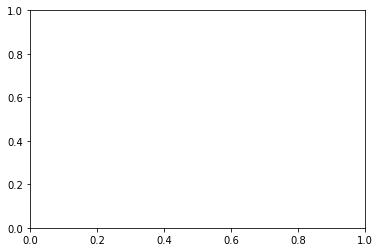

In [ ]:
confusion_mtrx(y_test, y_pred)

# WITH BASIC FEATURES

In [ ]:
# To do
# 


Include additional features to train and test data (Pipeline)



In [ ]:
def make_targets_categorical_label(df):

  ## Create an instance of CountVectorizer for training data tokens
  #count_vectorizer = CountVectorizer()

  # Create an instance of LabelEncoder for training data targets
  label_encoder = LabelEncoder()




  #x_train = df['token']
  y_train = df['target']

 
  # Fit the label encoder to the tokens
  label_encoder.fit(y_train)

  #y_all = np.concatenate([y_train], axis=0)

  # Fit the label encoder to the targets
  label_encoder.fit(y_train)


  # Encode training data y
  y_train = label_encoder.transform(y_train)


  #print(X_train)
  print(f'{len(set(y_train))}: Arguement categories')


  #df = df.assign(label=[0 if target=="_" or target=="V" else 1 for target in df['target']])
  #df= df.drop('target', axis=1)
  return y_train

#clean column
def columns_cleaning(df): #political choices inside
  """This function perform a preprocessing steps that consists of:
  - in removing rows with missinvg value for distance head feature
  - cast numerical features to int 
  - drop token_id (I belive is useless)
  

  """
  df=df[df["distance_head"]!="_"]#like this
  df["distance_head"]=df["distance_head"].astype(int) #WARNING IS FROM HERE
  
  df["sent_id"]=df["sent_id"].astype(int) #WARNING IS FROM HERE

  df= df.drop('token_id', axis=1) #or this
  df=df[['sent_id', 'repetion_id','token', 'lemma', 'POS', 'uni_POS', 'morph_type',
        'distance_head', 'dep_label', 'dep_rel', 'space', 'probbank' ,'label']]

  return df


def make_NER(df):
  return df


"""cols_to_encode=[ 'token', 'lemma', 'POS', 'uni_POS',
       'morph_type', 'dep_label', 'dep_rel', 'space',
       'probbank']"""

"""cols_to_encode=[ 'POS', 'uni_POS',
       'morph_type', 'dep_label', 'dep_rel', 'space',
       'probbank']"""


def create_encoding(train_df,test_df,cols_to_encode):
  """This function creates a label encoding (just assign number to every value) for all columns in the list cols_to_encode """
  # create a LabelEncoder objec
  oe = OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=-1)
  train_df=oe.fit_transform(df_train[cols_to_encode])
  test_df = oe.transform(df_test[cols_to_encode])
  #print(oe.categories_)
  # iterate over the columns to encode
  """for col in cols_to_encode:
      train_df[col] = oe.fit_transform(train_df[col])
      test_df[col] = oe.transform(test_df[col])
  """
  return train_df, test_df


In [ ]:
def prepare_token_data(tokens_train, tokens_test):

  encoder = LabelEncoder()
  vectorizer = CountVectorizer()

  X_train = vectorizer.fit_transform(tokens_train['token'])
  X_test = vectorizer.transform(tokens_test['token'])
  

  y_train = tokens_train['target']
  y_test = tokens_test['target']
  y_all = np.concatenate([y_train, y_test], axis=0)


  # Fit the label encoder to the targets
  encoder.fit(y_all.astype(str))

  
  y_train = encoder.transform(y_train.astype(str))
  y_test = encoder.transform(y_test.astype(str))




  return X_train, X_test, y_train, y_test, encoder


In [ ]:
def logistic_reg(X_train, X_test, y_train, y_test):
  #instantiate the model
  log_regression = LogisticRegression(penalty='l2')

  #fit the model using the training data
  log_regression.fit(X_train, y_train)

  #use model to make predictions on test data
  y_pred = log_regression.predict(X_test)
  return y_pred

In [ ]:
def confusion_mtrx(y_test, y_pred):

  # get all categories of LabelEncoder in list
  categories = list(set(y_test))

  size = len(categories)

  cm = confusion_matrix(y_test, y_pred)
  ax= plt.subplot()

  #ax.rcParams['figure.figsize'] = [3.8,3.8]

  sns.heatmap(cm, annot=True, fmt='g', ax=ax,cmap='Blues');  #annot=True to annotate cells, ftm='g' to disable scientific notation
  sns.color_palette("tab10")  
  


  # labels, title and ticks
  ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
  ax.set_title('Confusion Matrix'); 
  ax.xaxis.set_ticklabels(categories); ax.yaxis.set_ticklabels(categories);
  return 0

In [ ]:
tokens_train = train[["token", "target"]]
tokens_test = test[["token", "target"]]


X_train, X_test, y_train, y_test, encoder = prepare_token_data(tokens_train, tokens_test)

# reshape data so they fit to model
#X_train = X_train.reshape(-1, 1)
#X_test = X_test.reshape(-1, 1)

print(X_train.shape)
print(y_train.shape)


print(f'\n{X_test.shape}')
print(y_test.shape)

y_pred = logistic_reg(X_train, X_test, y_train, y_test)
f1 = f1_score(y_test, y_pred, average='micro')
print(f"\n{f1=}\n")
print(classification_report(y_test, y_pred))



# Decode the predicted target values
y_test = encoder.inverse_transform(y_test)

# Decode the actual target values
y_pred = encoder.inverse_transform(y_pred)